In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
data = pd.read_csv('end.csv')
data = data.iloc[:,1:]
data

,time,quant
0,2015-12-20,441.78
1,2015-12-21,437.59
2,2015-12-22,437.03
3,2015-12-23,442.43
4,2015-12-24,452.98
...,...,...
1996,2021-06-07,33582.86
1997,2021-06-08,33409.38
1998,2021-06-09,37391.58
1999,2021-06-10,36680.78


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
from datetime import datetime

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
from sklearn import tree
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [12]:
def fromdate(s):
    return datetime.timestamp(s)
projection = 200
data['time'] = pd.to_datetime(data['time'], format='%Y-%M-%d')
new_dates = pd.date_range('2022-06-12', periods=projection, freq='D')
data['time2'] = data['time'].apply(fromdate)
X = data[['time2']]
y = data[['quant']]
df2 = pd.DataFrame({'time': new_dates})
df2['time'] = pd.to_datetime(df2['time'], format='%Y-%M-%d')
df2['time2'] = df2['time'].apply(fromdate)
df = pd.concat([data, df2], ignore_index=True)
df

,time,quant,time2
0,2015-01-20 00:12:00,441.78,1.421702e+09
1,2015-01-21 00:12:00,437.59,1.421788e+09
2,2015-01-22 00:12:00,437.03,1.421875e+09
3,2015-01-23 00:12:00,442.43,1.421961e+09
4,2015-01-24 00:12:00,452.98,1.422048e+09
...,...,...,...
2196,2022-12-24 00:00:00,NaN,1.671829e+09
2197,2022-12-25 00:00:00,NaN,1.671916e+09
2198,2022-12-26 00:00:00,NaN,1.672002e+09
2199,2022-12-27 00:00:00,NaN,1.672088e+09


0.996885959466568
10.33238087342649


,time,quant,time2,predict
0,2015-01-20 00:12:00,441.78,1.421702e+09,0.000000
1,2015-01-21 00:12:00,437.59,1.421788e+09,651.806893
2,2015-01-22 00:12:00,437.03,1.421875e+09,543.878300
3,2015-01-23 00:12:00,442.43,1.421961e+09,496.234695
4,2015-01-24 00:12:00,452.98,1.422048e+09,477.727413
...,...,...,...,...
2196,2022-12-24 00:00:00,NaN,1.671829e+09,40655.192551
2197,2022-12-25 00:00:00,NaN,1.671916e+09,40673.568850
2198,2022-12-26 00:00:00,NaN,1.672002e+09,40691.945148
2199,2022-12-27 00:00:00,NaN,1.672088e+09,40710.321447


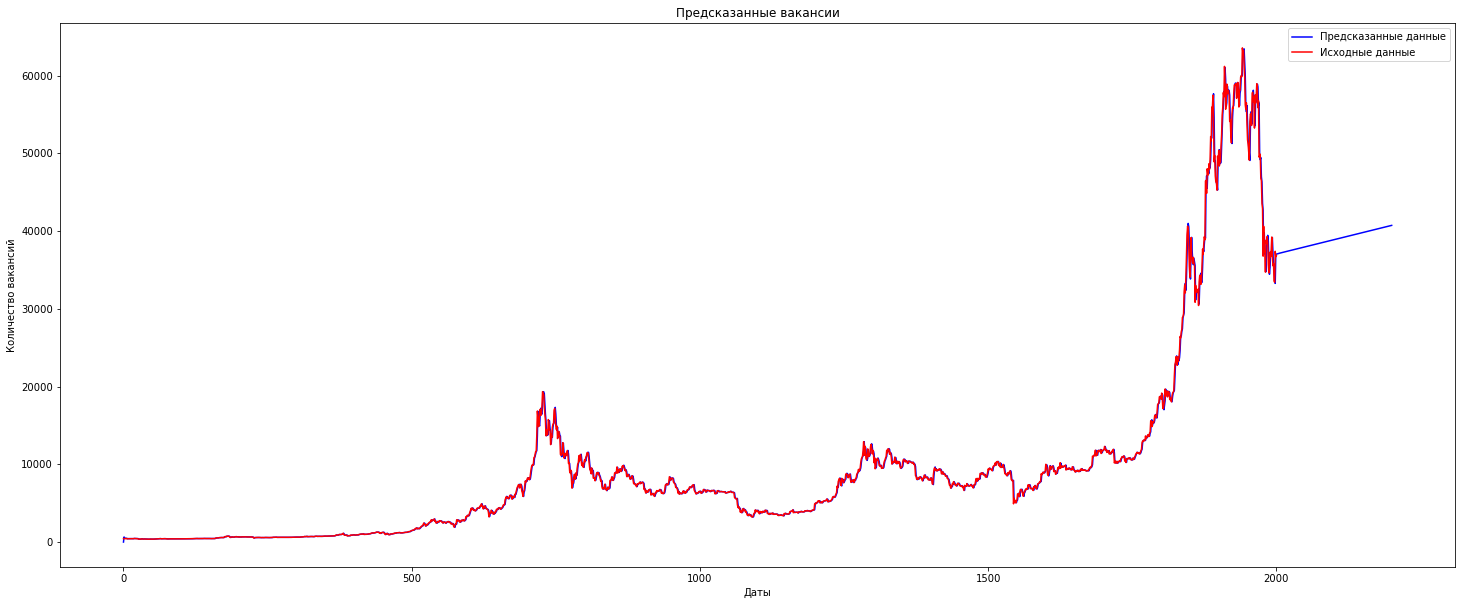

In [13]:
#arima
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()
model = ARIMA(df[['quant']], order=(4, 2, 1)).fit()
df['predict'] = model.predict(0, len(df)-1)
plt.figure(figsize = (25, 10))
plt.plot(df['predict'], 'blue', label = 'Предсказанные данные') 
plt.plot(df['quant'], 'red', label = 'Исходные данные')
plt.title('Предсказанные вакансии') 
plt.xlabel('Даты')
plt.ylabel('Количество вакансий')
plt.legend()
print(r2_score(df['predict'][:-projection], df['quant'][:-projection]))
print(mean_forecast_err(df.quant, df.predict))
df

0.49730851214277216
-37.527257520842895
-0.04696336908114018


,time,quant,time2,predict
0,2015-01-20 00:12:00,441.78,1.421702e+09,-8014.195983
1,2015-01-21 00:12:00,437.59,1.421788e+09,-7999.326420
2,2015-01-22 00:12:00,437.03,1.421875e+09,-7984.456856
3,2015-01-23 00:12:00,442.43,1.421961e+09,-7969.587293
4,2015-01-24 00:12:00,452.98,1.422048e+09,-7954.717730
...,...,...,...,...
2196,2022-12-24 00:00:00,NaN,1.671829e+09,35033.065884
2197,2022-12-25 00:00:00,NaN,1.671916e+09,35047.935447
2198,2022-12-26 00:00:00,NaN,1.672002e+09,35062.805010
2199,2022-12-27 00:00:00,NaN,1.672088e+09,35077.674574


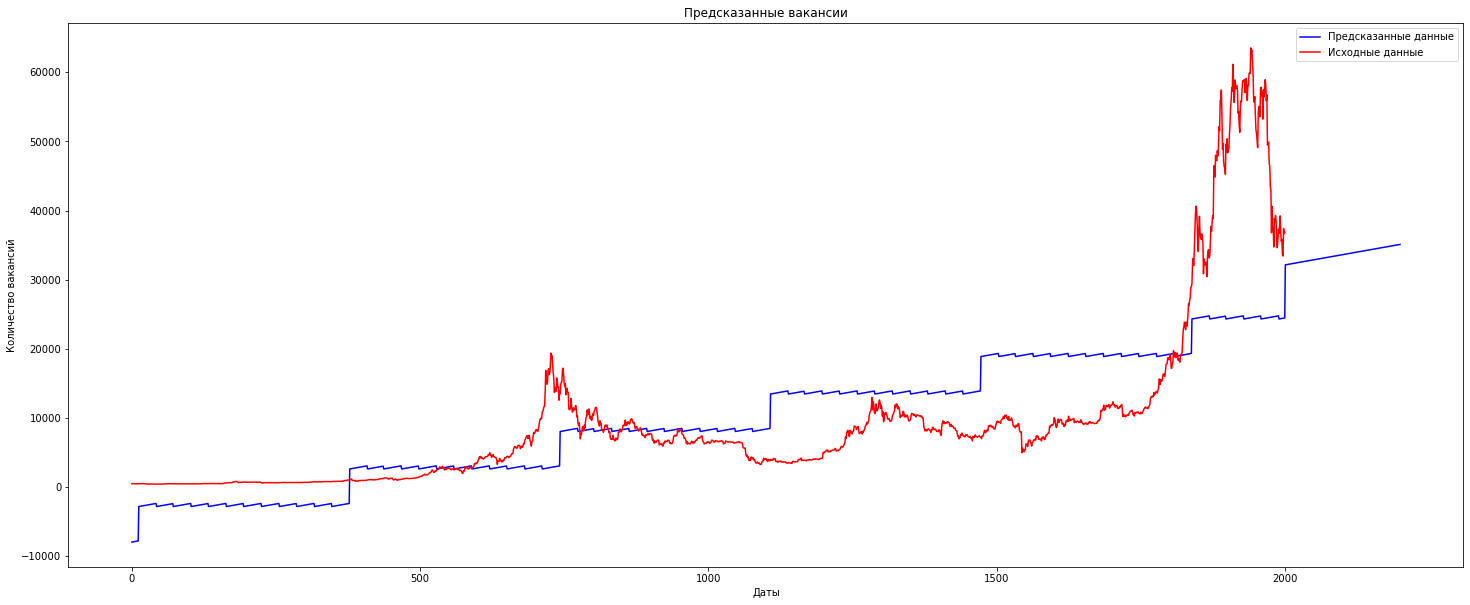

In [14]:
#linear
df['predict'] = df['quant']
X = df[['time2']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_test, y_test))
df ['predict'] = model.predict(df[['time2']])
plt.figure(figsize = (25, 10))
plt.plot(df['predict'], 'blue', label = 'Предсказанные данные') 
plt.plot(df['quant'], 'red', label = 'Исходные данные')
plt.title('Предсказанные вакансии') 
plt.xlabel('Даты')
plt.ylabel('Количество вакансий')
plt.legend()
print(mean_forecast_err(df.quant, df.predict))
print(r2_score(df['predict'][:-projection], df['quant'][:-projection]))
df

0.0009261512814506823
-1145.0534082970878
-1216.6341244487623


,time,quant,time2,predict
0,2015-01-20 00:12:00,441.78,1.421702e+09,9843.644489
1,2015-01-21 00:12:00,437.59,1.421788e+09,9844.242720
2,2015-01-22 00:12:00,437.03,1.421875e+09,9844.840952
3,2015-01-23 00:12:00,442.43,1.421961e+09,9845.439184
4,2015-01-24 00:12:00,452.98,1.422048e+09,9846.037416
...,...,...,...,...
2196,2022-12-24 00:00:00,NaN,1.671829e+09,11575.520482
2197,2022-12-25 00:00:00,NaN,1.671916e+09,11576.118714
2198,2022-12-26 00:00:00,NaN,1.672002e+09,11576.716945
2199,2022-12-27 00:00:00,NaN,1.672088e+09,11577.315177


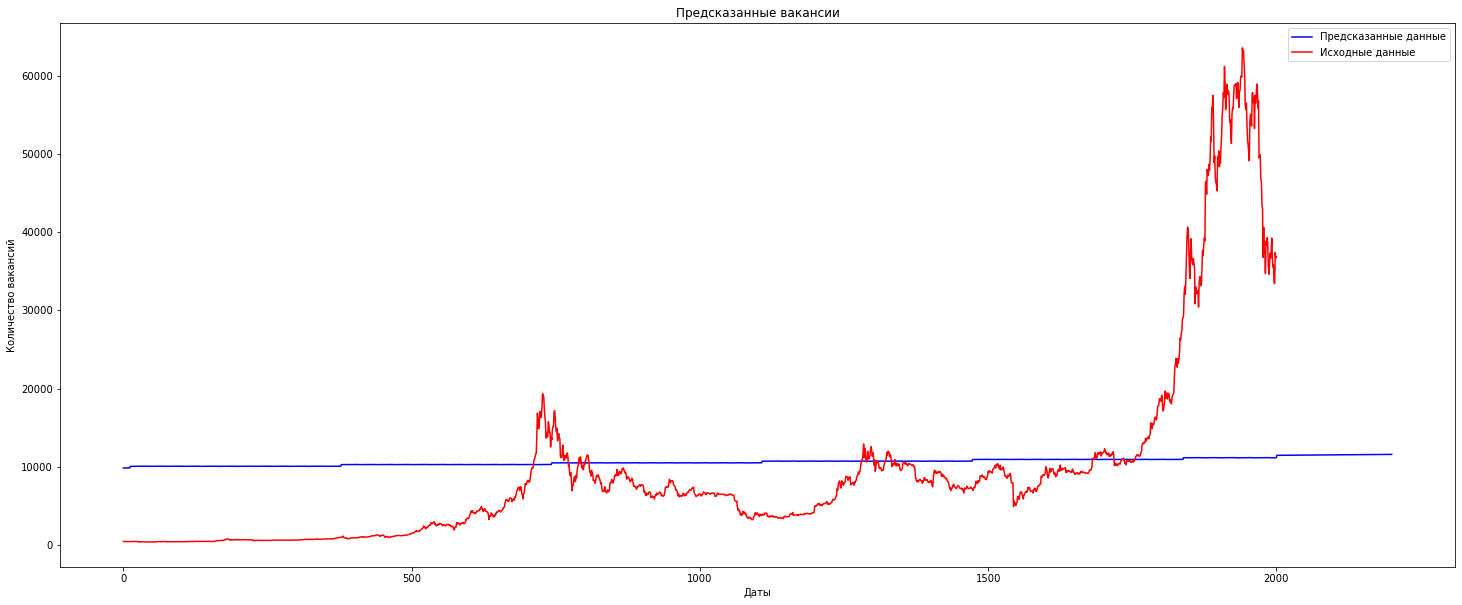

In [15]:
#MLP
df['predict'] = df['quant']
X = df[['time2']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
model = MLPRegressor().fit(X_train, y_train)
print(model.score(X_test, y_test))
df ['predict'] = model.predict(df[['time2']])
plt.figure(figsize = (25, 10))
plt.plot(df['predict'], 'blue', label = 'Предсказанные данные') 
plt.plot(df['quant'], 'red', label = 'Исходные данные')
plt.title('Предсказанные вакансии') 
plt.xlabel('Даты')
plt.ylabel('Количество вакансий')
plt.legend()
print(mean_forecast_err(df.quant, df.predict))
print(r2_score(df['predict'][:-projection], df['quant'][:-projection]))
df

0.8598267974271233
73.35013451328349
0.8845639926101256


,time,quant,time2,predict
0,2015-01-20 00:12:00,441.78,1.421702e+09,430.677692
1,2015-01-21 00:12:00,437.59,1.421788e+09,430.677692
2,2015-01-22 00:12:00,437.03,1.421875e+09,430.677692
3,2015-01-23 00:12:00,442.43,1.421961e+09,430.677692
4,2015-01-24 00:12:00,452.98,1.422048e+09,430.677692
...,...,...,...,...
2196,2022-12-24 00:00:00,NaN,1.671829e+09,NaN
2197,2022-12-25 00:00:00,NaN,1.671916e+09,NaN
2198,2022-12-26 00:00:00,NaN,1.672002e+09,NaN
2199,2022-12-27 00:00:00,NaN,1.672088e+09,NaN


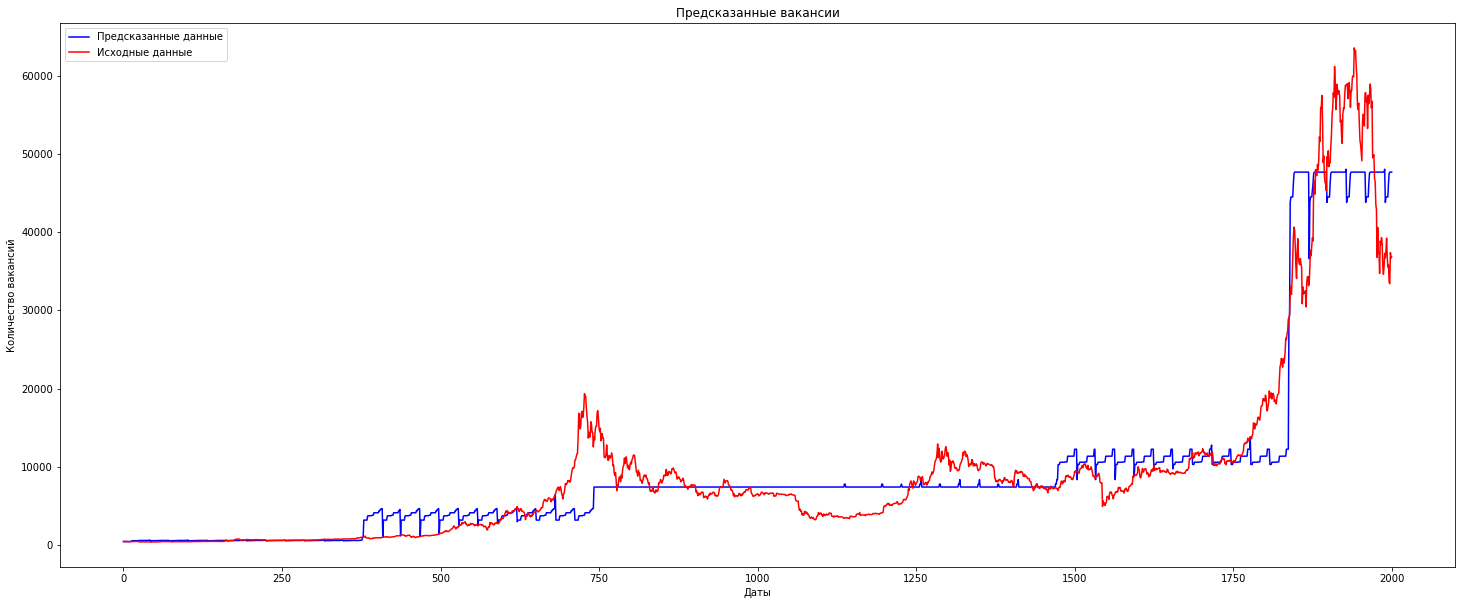

In [16]:
#IsotonicRegression
df['predict'] = df['quant']
X = df[['time2']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
model = IsotonicRegression().fit(X_train, y_train)
print(model.score(X_test, y_test))
df ['predict'] = model.predict(df[['time2']])
plt.figure(figsize = (25, 10))
plt.plot(df['predict'], 'blue', label = 'Предсказанные данные') 
plt.plot(df['quant'], 'red', label = 'Исходные данные')
plt.title('Предсказанные вакансии') 
plt.xlabel('Даты')
plt.ylabel('Количество вакансий')
plt.legend()
print(mean_forecast_err(df.quant, df.predict))
print(r2_score(df['predict'][:-projection], df['quant'][:-projection]))
df

0.8350340500208283
-53.422254705980286
0.9605437592313623


,time,quant,time2,predict
0,2015-01-20 00:12:00,441.78,1.421702e+09,441.78
1,2015-01-21 00:12:00,437.59,1.421788e+09,437.59
2,2015-01-22 00:12:00,437.03,1.421875e+09,437.03
3,2015-01-23 00:12:00,442.43,1.421961e+09,442.43
4,2015-01-24 00:12:00,452.98,1.422048e+09,452.98
...,...,...,...,...
2196,2022-12-24 00:00:00,NaN,1.671829e+09,37290.83
2197,2022-12-25 00:00:00,NaN,1.671916e+09,37290.83
2198,2022-12-26 00:00:00,NaN,1.672002e+09,37290.83
2199,2022-12-27 00:00:00,NaN,1.672088e+09,37290.83


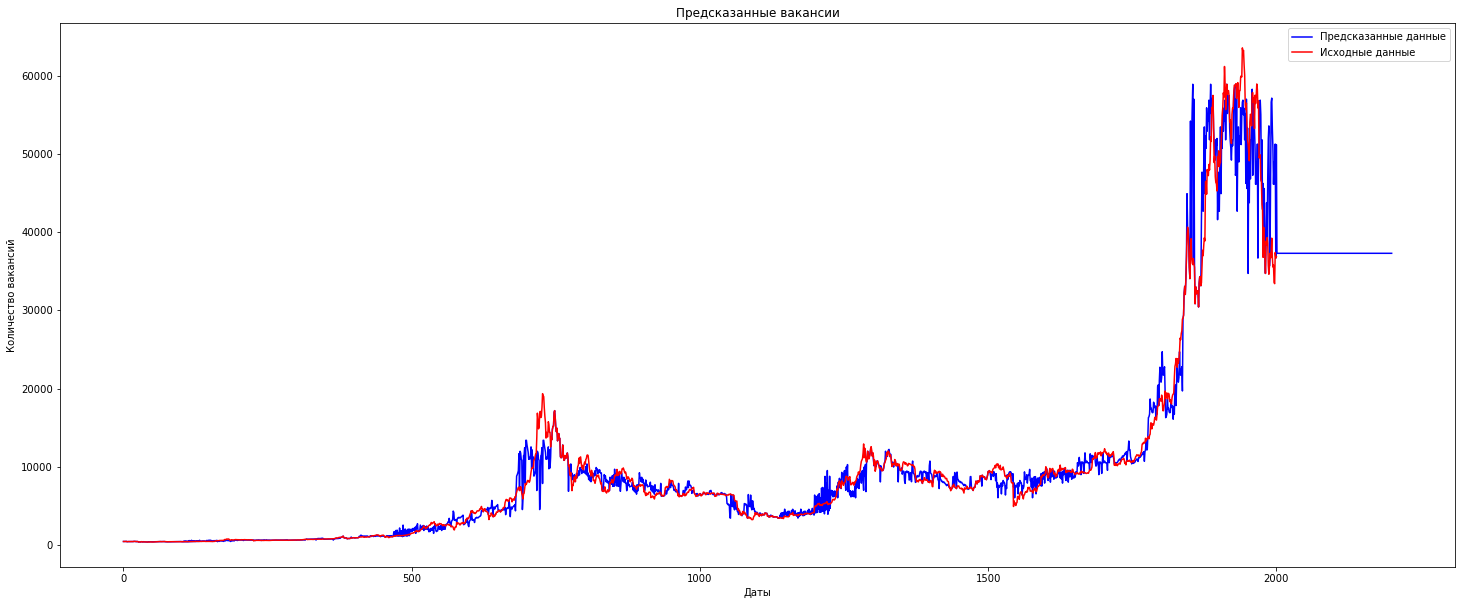

In [17]:
#tree.DecisionTreeRegressor
df['predict'] = df['quant']
X = df[['time2']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
model = tree.DecisionTreeRegressor().fit(X_train, y_train)
print(model.score(X_test, y_test))
df ['predict'] = model.predict(df[['time2']])
plt.figure(figsize = (25, 10))
plt.plot(df['predict'], 'blue', label = 'Предсказанные данные') 
plt.plot(df['quant'], 'red', label = 'Исходные данные')
plt.title('Предсказанные вакансии') 
plt.xlabel('Даты')
plt.ylabel('Количество вакансий')
plt.legend()
print(mean_forecast_err(df.quant, df.predict))
print(r2_score(df['predict'][:-projection], df['quant'][:-projection]))
df

0.4747100630279901
-24.074988647734344
-0.048944883670651196


C:\Users\Vladimir\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:230: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(


,time,quant,time2,predict
0,2015-01-20 00:12:00,441.78,1.421702e+09,-8010.951181
1,2015-01-21 00:12:00,437.59,1.421788e+09,-7996.095843
2,2015-01-22 00:12:00,437.03,1.421875e+09,-7981.240506
3,2015-01-23 00:12:00,442.43,1.421961e+09,-7966.385169
4,2015-01-24 00:12:00,452.98,1.422048e+09,-7951.529831
...,...,...,...,...
2196,2022-12-24 00:00:00,NaN,1.671829e+09,34995.126627
2197,2022-12-25 00:00:00,NaN,1.671916e+09,35009.981964
2198,2022-12-26 00:00:00,NaN,1.672002e+09,35024.837301
2199,2022-12-27 00:00:00,NaN,1.672088e+09,35039.692639


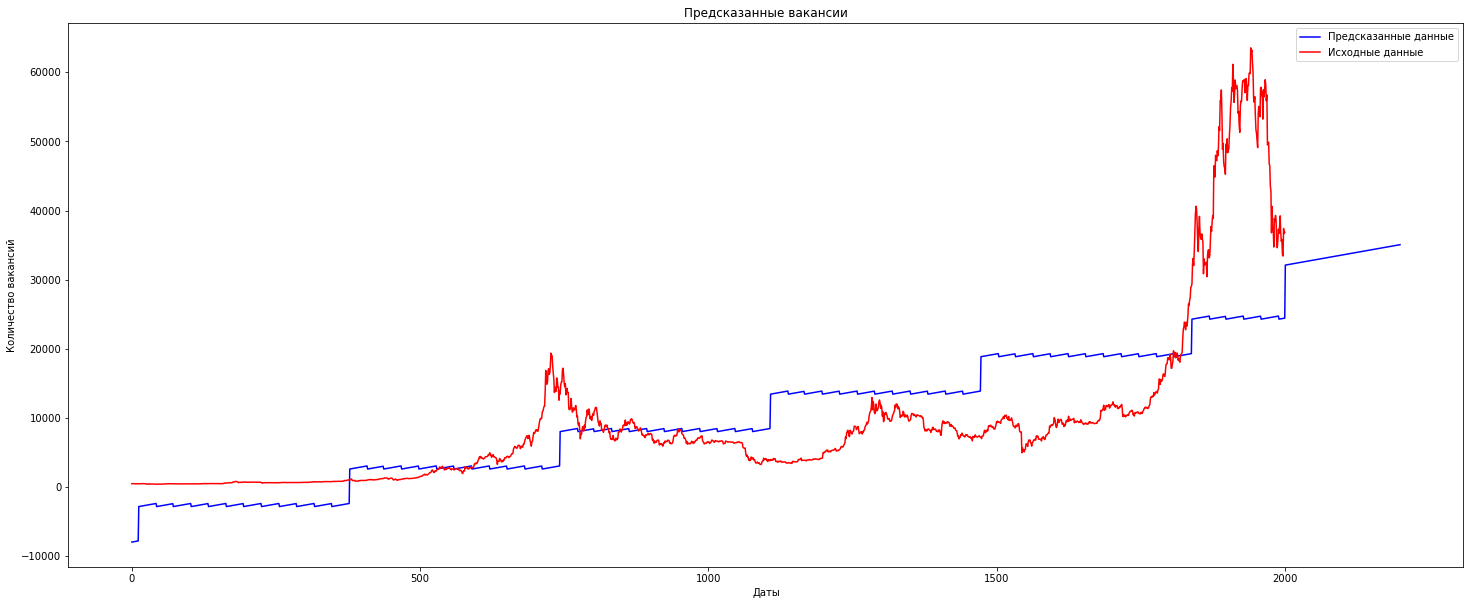

In [18]:
#PLSRegression
df['predict'] = df['quant']
X = df[['time2']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
model = PLSRegression().fit(X_train, y_train)
print(model.score(X_test, y_test))
df ['predict'] = model.predict(df[['time2']])
plt.figure(figsize = (25, 10))
plt.plot(df['predict'], 'blue', label = 'Предсказанные данные') 
plt.plot(df['quant'], 'red', label = 'Исходные данные')
plt.title('Предсказанные вакансии') 
plt.xlabel('Даты')
plt.ylabel('Количество вакансий')
plt.legend()
print(mean_forecast_err(df.quant, df.predict))
print(r2_score(df['predict'][:-projection], df['quant'][:-projection]))
df

0.8913145244048465
-35.034167916041774
0.9627707005359635


,time,quant,time2,predict
0,2015-01-20 00:12:00,441.78,1.421702e+09,439.685
1,2015-01-21 00:12:00,437.59,1.421788e+09,439.685
2,2015-01-22 00:12:00,437.03,1.421875e+09,439.730
3,2015-01-23 00:12:00,442.43,1.421961e+09,447.705
4,2015-01-24 00:12:00,452.98,1.422048e+09,453.515
...,...,...,...,...
2196,2022-12-24 00:00:00,NaN,1.671829e+09,48042.315
2197,2022-12-25 00:00:00,NaN,1.671916e+09,48042.315
2198,2022-12-26 00:00:00,NaN,1.672002e+09,48042.315
2199,2022-12-27 00:00:00,NaN,1.672088e+09,48042.315


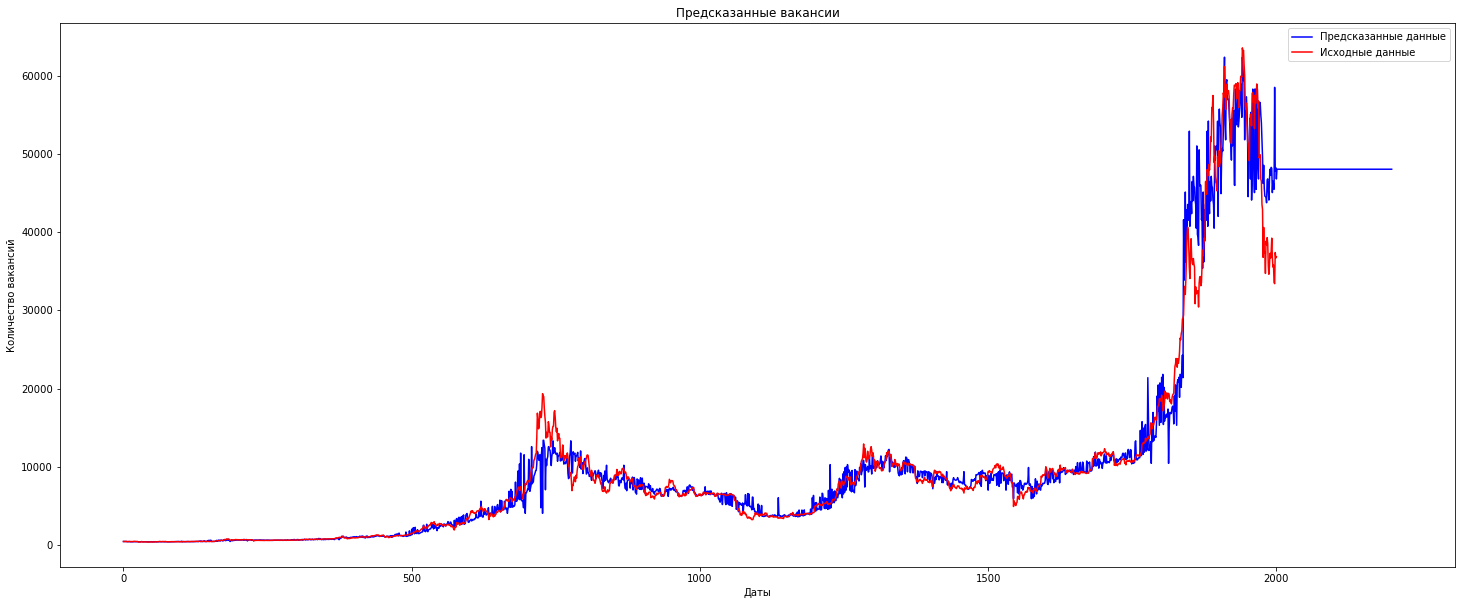

In [19]:
#KNeighborsRegressor
df['predict'] = df['quant']
X = df[['time2']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
model = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)
print(model.score(X_test, y_test))
df ['predict'] = model.predict(df[['time2']])
plt.figure(figsize = (25, 10))
plt.plot(df['predict'], 'blue', label = 'Предсказанные данные') 
plt.plot(df['quant'], 'red', label = 'Исходные данные')
plt.title('Предсказанные вакансии') 
plt.xlabel('Даты')
plt.ylabel('Количество вакансий')
plt.legend()
print(mean_forecast_err(df.quant, df.predict))
print(r2_score(df['predict'][:-projection], df['quant'][:-projection]))
df

0.42906513488706144
7.918300101096447
-0.057104920683935134


,time,quant,time2,predict
0,2015-01-20 00:12:00,441.78,1.421702e+09,-7975.158803
1,2015-01-21 00:12:00,437.59,1.421788e+09,-7960.361219
2,2015-01-22 00:12:00,437.03,1.421875e+09,-7945.563635
3,2015-01-23 00:12:00,442.43,1.421961e+09,-7930.766052
4,2015-01-24 00:12:00,452.98,1.422048e+09,-7915.968468
...,...,...,...,...
2196,2022-12-24 00:00:00,NaN,1.671829e+09,34863.722681
2197,2022-12-25 00:00:00,NaN,1.671916e+09,34878.520264
2198,2022-12-26 00:00:00,NaN,1.672002e+09,34893.317848
2199,2022-12-27 00:00:00,NaN,1.672088e+09,34908.115432


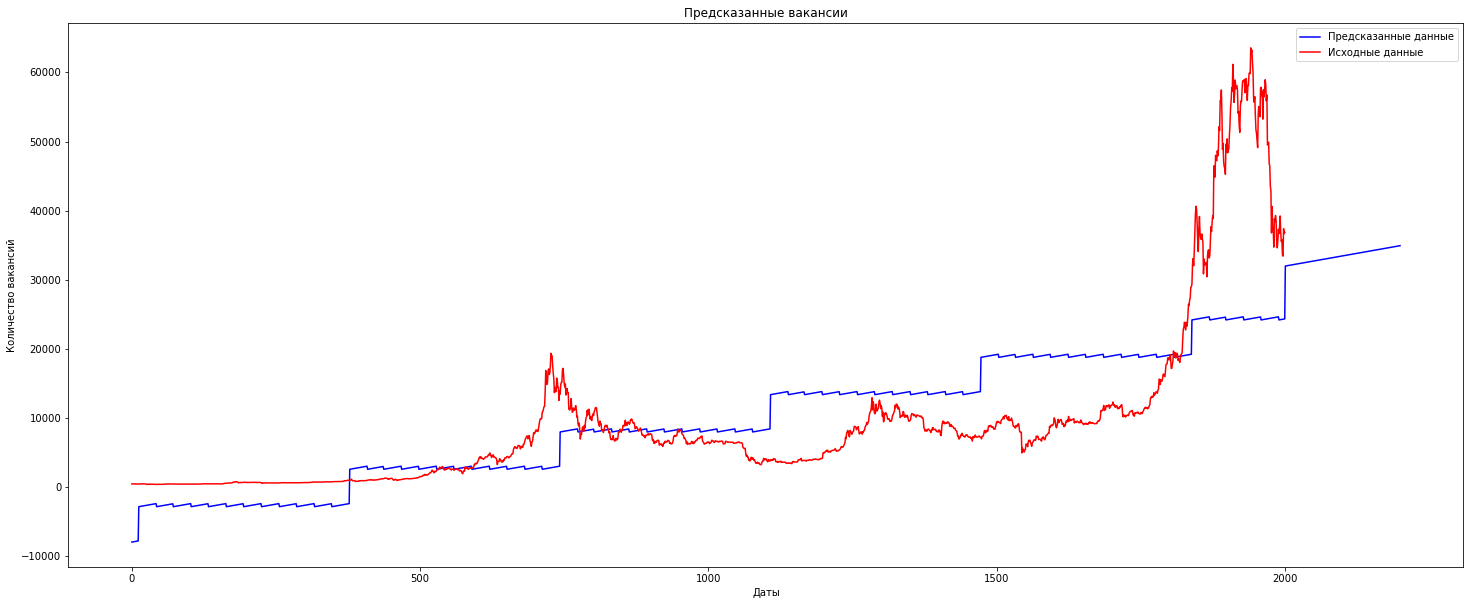

In [20]:
#SGDRegressor
df['predict'] = df['quant']
X = df[['time2']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=10000, tol=1e-10)).fit(X_train, y_train)
print(model.score(X_test, y_test))
df ['predict'] = model.predict(df[['time2']])
plt.figure(figsize = (25, 10))
plt.plot(df['predict'], 'blue', label = 'Предсказанные данные') 
plt.plot(df['quant'], 'red', label = 'Исходные данные')
plt.title('Предсказанные вакансии') 
plt.xlabel('Даты')
plt.ylabel('Количество вакансий')
plt.legend()
print(mean_forecast_err(df.quant, df.predict))
print(r2_score(df['predict'][:-projection], df['quant'][:-projection]))
df

C:\Users\Vladimir\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


0.03390522705659904
-101.34867066466106
-1470.4588581585494


,time,quant,time2,predict
0,2015-01-20 00:12:00,441.78,1.421702e+09,8895.00
1,2015-01-21 00:12:00,437.59,1.421788e+09,8868.50
2,2015-01-22 00:12:00,437.03,1.421875e+09,8913.75
3,2015-01-23 00:12:00,442.43,1.421961e+09,8888.00
4,2015-01-24 00:12:00,452.98,1.422048e+09,8871.50
...,...,...,...,...
2196,2022-12-24 00:00:00,NaN,1.671829e+09,10391.75
2197,2022-12-25 00:00:00,NaN,1.671916e+09,10428.00
2198,2022-12-26 00:00:00,NaN,1.672002e+09,10427.50
2199,2022-12-27 00:00:00,NaN,1.672088e+09,10476.75


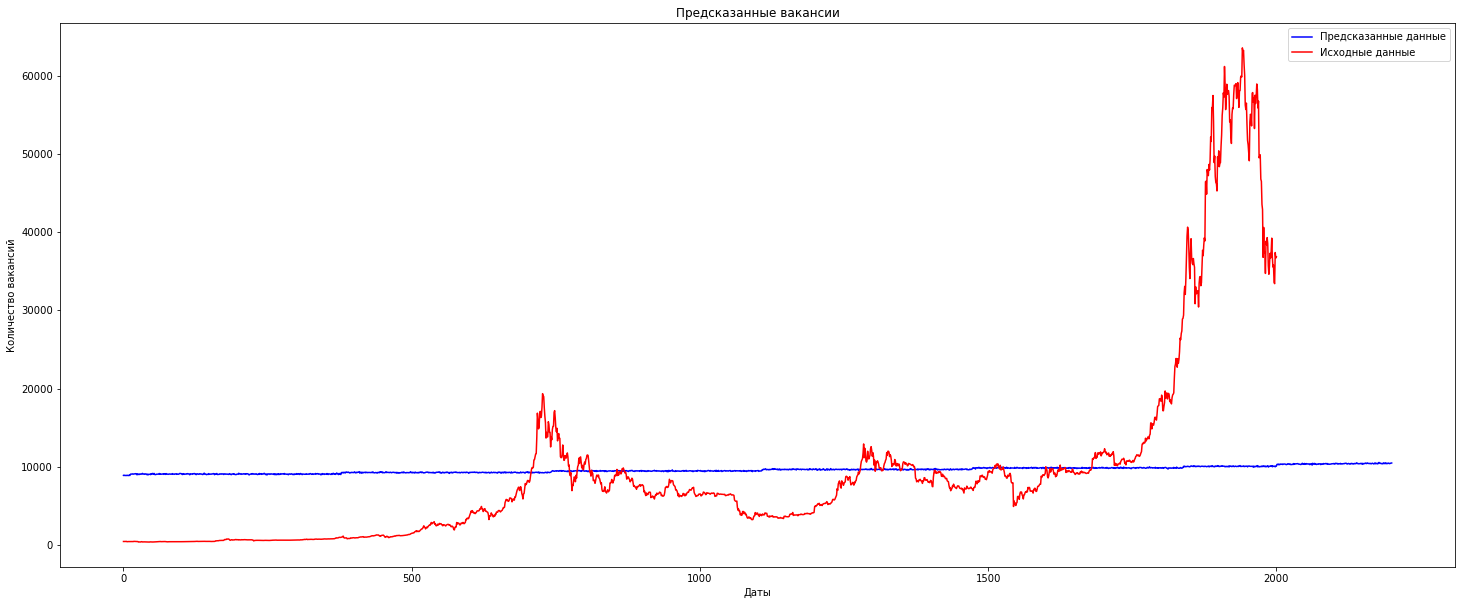

In [21]:
#SGDRegressor
df['predict'] = df['quant']
X = df[['time2']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
model = KernelRidge(alpha=0.1).fit(X_train, y_train)
print(model.score(X_test, y_test))
df ['predict'] = model.predict(df[['time2']])
plt.figure(figsize = (25, 10))
plt.plot(df['predict'], 'blue', label = 'Предсказанные данные') 
plt.plot(df['quant'], 'red', label = 'Исходные данные')
plt.title('Предсказанные вакансии') 
plt.xlabel('Даты')
plt.ylabel('Количество вакансий')
plt.legend()
print(mean_forecast_err(df.quant, df.predict))
print(r2_score(df['predict'][:-projection], df['quant'][:-projection]))
df

0.4762452898941153
-37.27829332310527
-0.059073820466519544


,time,quant,time2,predict
0,2015-01-20 00:12:00,441.78,1.421702e+09,-7913.921110
1,2015-01-21 00:12:00,437.59,1.421788e+09,-7899.137193
2,2015-01-22 00:12:00,437.03,1.421875e+09,-7884.353277
3,2015-01-23 00:12:00,442.43,1.421961e+09,-7869.569360
4,2015-01-24 00:12:00,452.98,1.422048e+09,-7854.785444
...,...,...,...,...
2196,2022-12-24 00:00:00,NaN,1.671829e+09,34885.394298
2197,2022-12-25 00:00:00,NaN,1.671916e+09,34900.178214
2198,2022-12-26 00:00:00,NaN,1.672002e+09,34914.962131
2199,2022-12-27 00:00:00,NaN,1.672088e+09,34929.746048


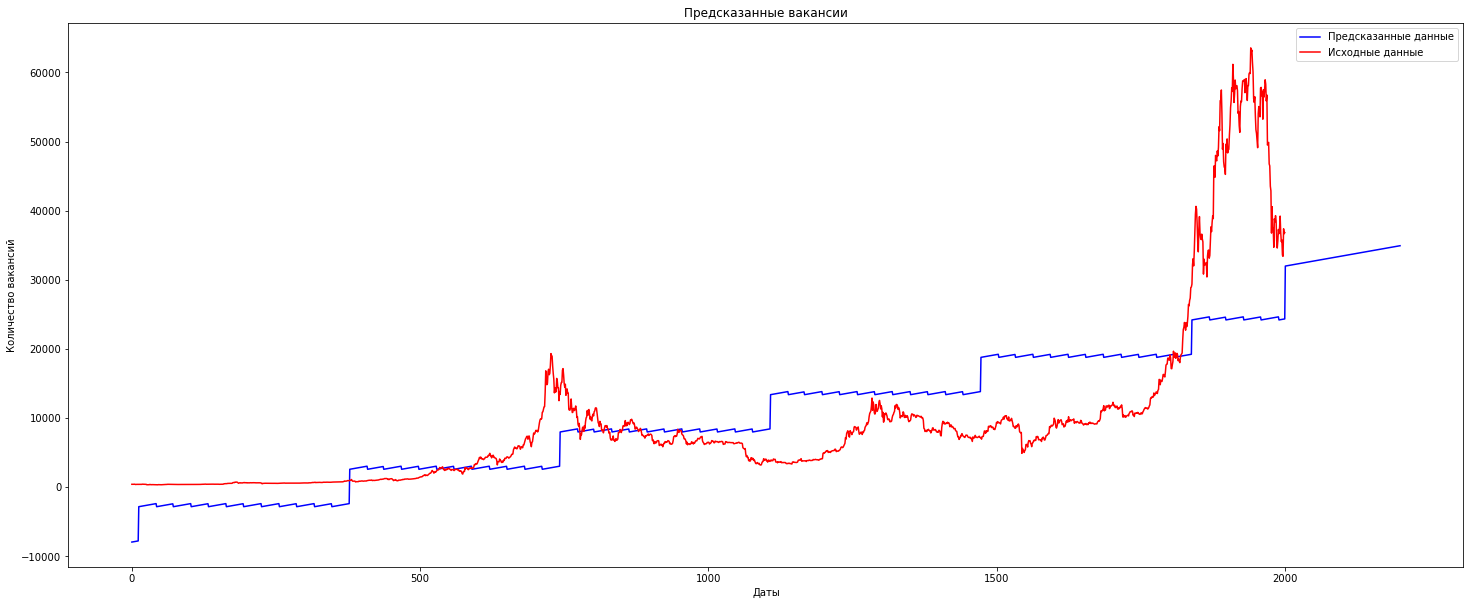

In [22]:
#BayesianRidge
df['predict'] = df['quant']
X = df[['time2']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
model = linear_model.BayesianRidge().fit(X_train, y_train)
print(model.score(X_test, y_test))
df ['predict'] = model.predict(df[['time2']])
plt.figure(figsize = (25, 10))
plt.plot(df['predict'], 'blue', label = 'Предсказанные данные') 
plt.plot(df['quant'], 'red', label = 'Исходные данные')
plt.title('Предсказанные вакансии') 
plt.xlabel('Даты')
plt.ylabel('Количество вакансий')
plt.legend()
print(mean_forecast_err(df.quant, df.predict))
print(r2_score(df['predict'][:-projection], df['quant'][:-projection]))
df

0.4561975595711464
-57.772919748786016
-0.054291224779285274


,time,quant,time2,predict
0,2015-01-20 00:12:00,441.78,1.421702e+09,-7933.065643
1,2015-01-21 00:12:00,437.59,1.421788e+09,-7918.247954
2,2015-01-22 00:12:00,437.03,1.421875e+09,-7903.430264
3,2015-01-23 00:12:00,442.43,1.421961e+09,-7888.612575
4,2015-01-24 00:12:00,452.98,1.422048e+09,-7873.794886
...,...,...,...,...
2196,2022-12-24 00:00:00,NaN,1.671829e+09,34964.021492
2197,2022-12-25 00:00:00,NaN,1.671916e+09,34978.839182
2198,2022-12-26 00:00:00,NaN,1.672002e+09,34993.656871
2199,2022-12-27 00:00:00,NaN,1.672088e+09,35008.474560


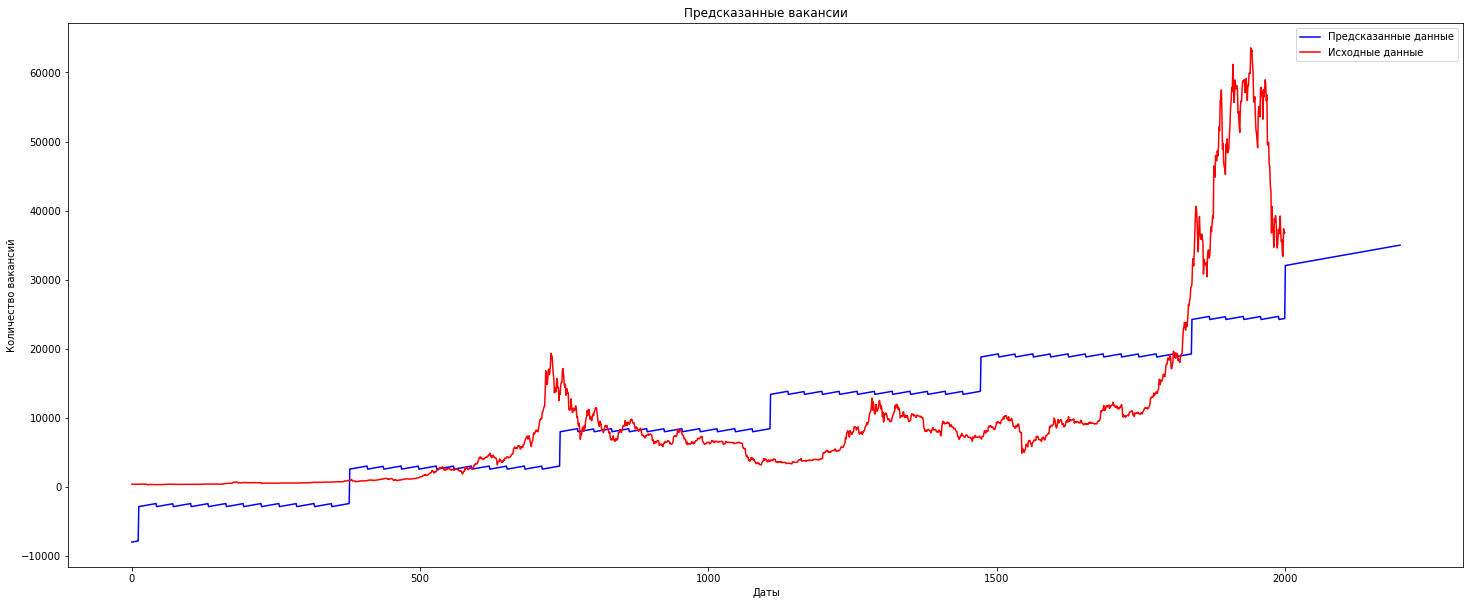

In [23]:
#LassoLars
df['predict'] = df['quant']
X = df[['time2']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
model = linear_model.LassoLars(alpha=.1, normalize=False).fit(X_train, y_train)
print(model.score(X_test, y_test))
df ['predict'] = model.predict(df[['time2']])
plt.figure(figsize = (25, 10))
plt.plot(df['predict'], 'blue', label = 'Предсказанные данные') 
plt.plot(df['quant'], 'red', label = 'Исходные данные')
plt.title('Предсказанные вакансии') 
plt.xlabel('Даты')
plt.ylabel('Количество вакансий')
plt.legend()
print(mean_forecast_err(df.quant, df.predict))
print(r2_score(df['predict'][:-projection], df['quant'][:-projection]))
df